## Read in Penguins File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing as prep
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
#from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# IMPORT DATASET 

In [2]:
pen = pd.read_csv('penguins_size.csv')
pen.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

# ANALYZE DATA

## The describe() function also provides a short summary of the data for each column.

In [3]:
pen.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

In [4]:
pen.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [5]:
pen['species'].describe()

count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object

In [6]:
unique_species = pen['species'].unique()
print(unique_species)

['Adelie' 'Chinstrap' 'Gentoo']


In [7]:
pen['island'].describe()

count        344
unique         3
top       Biscoe
freq         168
Name: island, dtype: object

In [8]:
unique_islands = pen['island'].unique()
print(unique_islands)

['Torgersen' 'Biscoe' 'Dream']


In [9]:
pen['sex'].describe()

count      334
unique       3
top       MALE
freq       168
Name: sex, dtype: object

In [10]:
unique_sexes = pen['sex'].unique()
print(unique_sexes)

['MALE' 'FEMALE' nan '.']


Since there is a unique entry for sex that is '.', we will replace it with NaN. 

In [11]:
pen['sex'][pen['sex'] == '.'] = np.nan

C:\Users\ljabl\AppData\Local\Temp\ipykernel_30464\3662066603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pen['sex'][pen['sex'] == '.'] = np.nan


In [12]:
unique_sexes_2 = pen['sex'].unique()
print(unique_sexes_2)

['MALE' 'FEMALE' nan]


# SELECTING MY FEATURES

I will use culmen_length_mm, culmen_depth_mm, flipper_length_mm and body_mass_g to predict sex. 

# CLEANING DATASET

### Check for missing values

In [13]:
pen.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

We have just a few missing values. Since it's such a small portion of the data, we feel it is ok to drop the rows that contain the missing values in the four predictors values.

In [14]:
pen.dropna(subset=['culmen_length_mm'], inplace=True)
pen.dropna(subset=['culmen_depth_mm'], inplace=True)
pen.dropna(subset=['flipper_length_mm'], inplace=True)
pen.dropna(subset=['body_mass_g'], inplace=True)

In [15]:
pen.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

There are still 8 missing values in sex. I have chosen not to remove those since sex will be what we want to predict. We already have complete data for our predictors. 

### Remove duplicates

In [16]:
pen.drop_duplicates(inplace=True)

# CHECK FOR OUTLIERS

<AxesSubplot:>

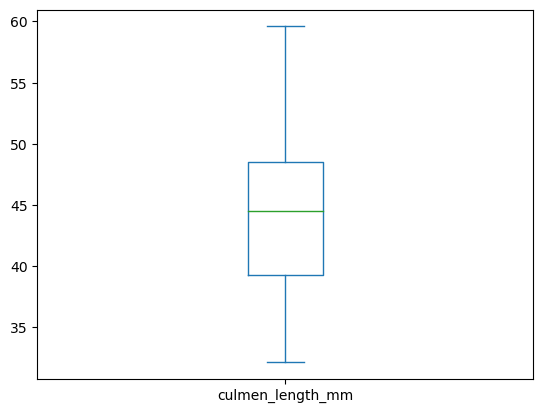

In [17]:
pen['culmen_length_mm'].plot.box()

<AxesSubplot:>

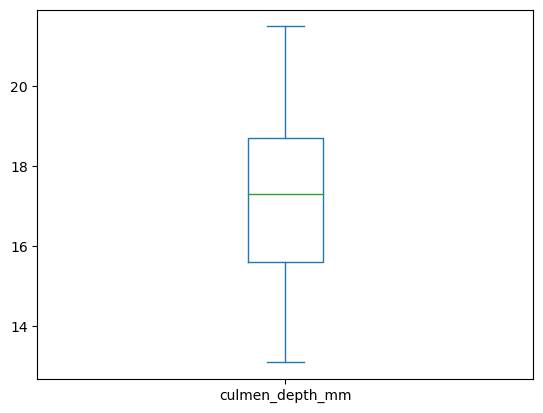

In [18]:
pen['culmen_depth_mm'].plot.box()

<AxesSubplot:>

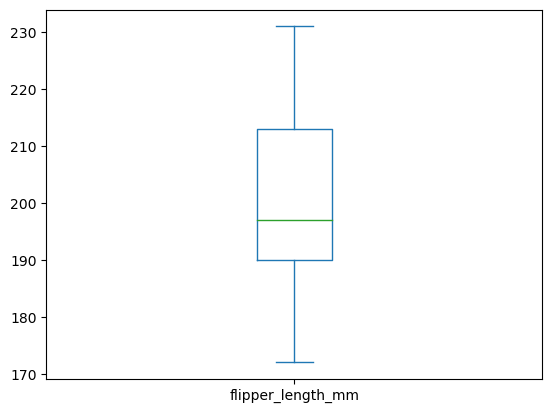

In [19]:
pen['flipper_length_mm'].plot.box()

<AxesSubplot:>

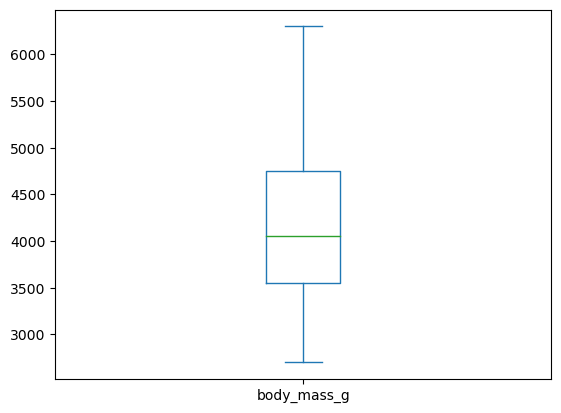

In [20]:
pen['body_mass_g'].plot.box()

There seem to be no outliers in the data. 

# HISTOGRAMS TO VISUALIZE DATA

Text(0.5, 1.0, 'Histogram of Body Mass for Penguins')

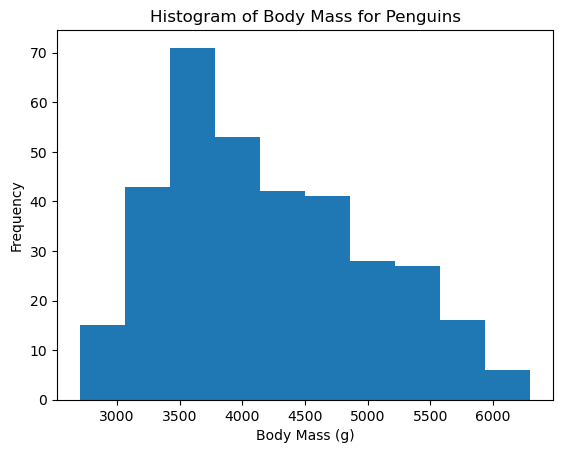

In [21]:
pen['body_mass_g'].plot.hist()
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.title('Histogram of Body Mass for Penguins')

Text(0.5, 1.0, 'Histogram of Flipper Length for Penguins')

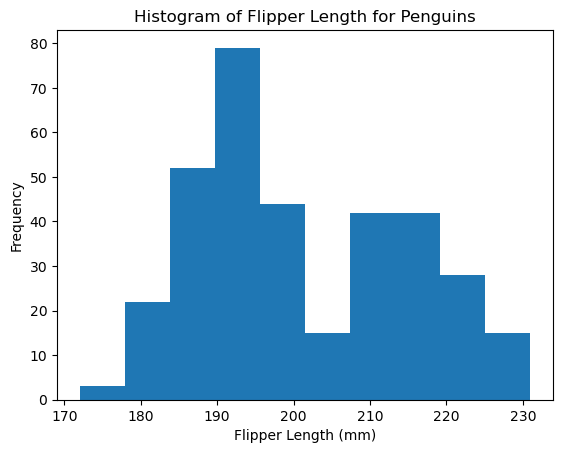

In [22]:
pen['flipper_length_mm'].plot.hist()
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Flipper Length for Penguins')

Text(0.5, 1.0, 'Histogram of Culmen Depth for Penguins')

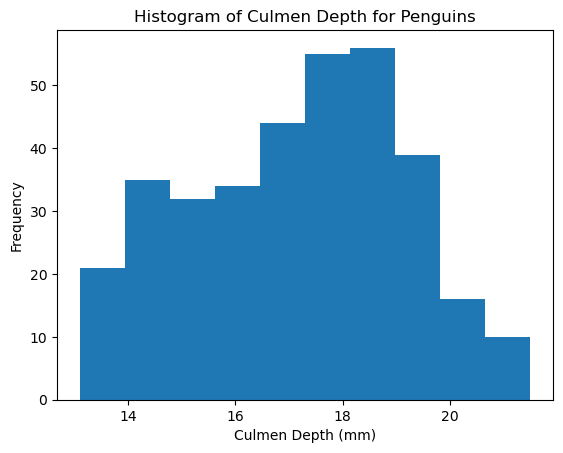

In [23]:
pen['culmen_depth_mm'].plot.hist()
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Culmen Depth for Penguins')

Text(0.5, 1.0, 'Histogram of Culmen Length for Penguins')

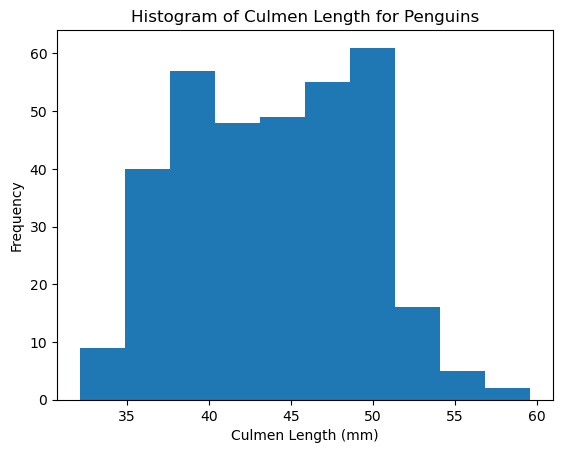

In [24]:
pen['culmen_length_mm'].plot.hist()
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Culmen Length for Penguins')

# SPECIES COUNT PLOT

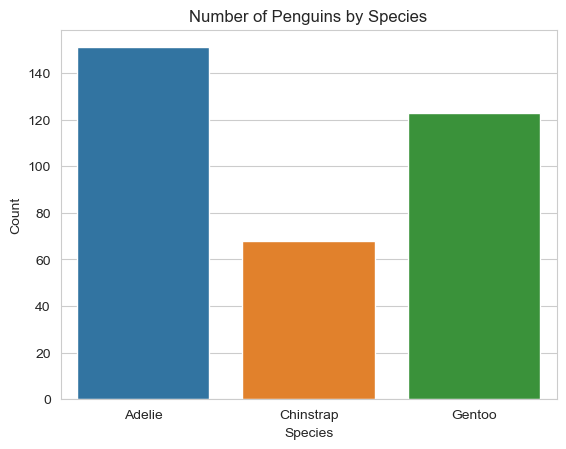

In [25]:
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(x='species', data=pen)

plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Number of Penguins by Species")

plt.show()

# SPECIES BASED ISLAND COUNT PLOT

In [26]:
px.bar( data_frame=pen, y = 'island', 
        facet_row='species',facet_row_spacing=0.10, 
        pattern_shape='species',
        color='species', 
        color_discrete_map={'Adelie':'blue', 'Gentoo':'green', 'Chinstrap':'red'},
        width=1200,height=900 )

# SPECIES BASED SEX COUNT PLOT

In [27]:
fig =px.bar( data_frame=pen, y = 'sex',
facet_row='species',facet_row_spacing=0.10,
pattern_shape='species',
color='species',
color_discrete_map={'Adelie':'blue', 'Gentoo':'green', 'Chinstrap':'red'},
width=1200,height=500 )
fig.show()

# SCATTER PLOTS

Since we have four continuous predictors, we can create six unique scatter plots. 

- Body Mass v Flipper Length
- Body Mass v Culmen Length
- Body Mass v Culmen Depth
- Culmen Depth v Culmen Length
- Flipper Length v Culmen Length
- Flipper Length v Culmen Depth


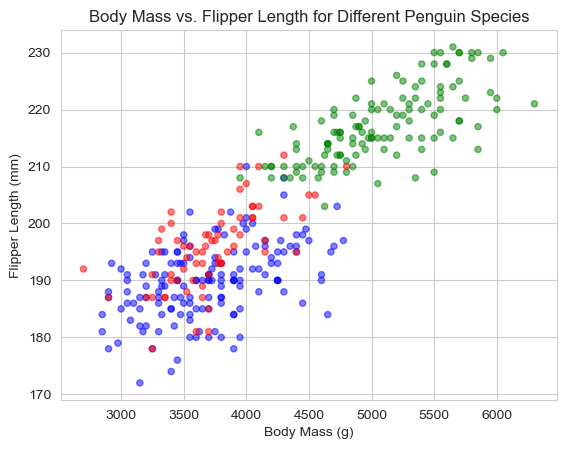

In [28]:
species_list = ['Adelie', 'Gentoo', 'Chinstrap']
species_pen = pen[pen['species'].isin(species_list)]
colors = {'Adelie':'blue', 'Gentoo':'green', 'Chinstrap':'red'}
species_pen['color'] = species_pen['species'].apply(lambda x: colors[x])

sp1 = species_pen.plot(kind='scatter', x='body_mass_g', y='flipper_length_mm', c=species_pen['color'], alpha=0.5)

sp1.set_xlabel('Body Mass (g)')
sp1.set_ylabel('Flipper Length (mm)')
sp1.set_title('Body Mass vs. Flipper Length for Different Penguin Species')

plt.show()

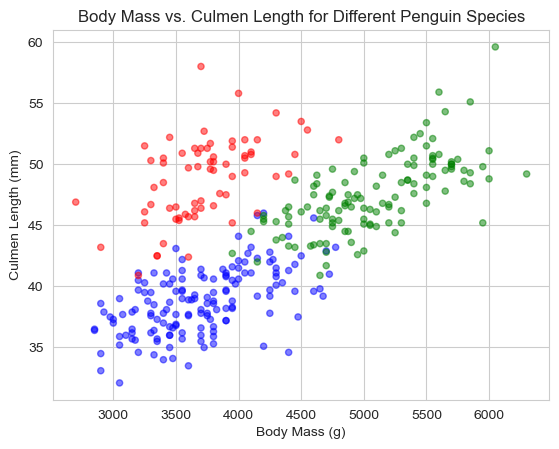

In [29]:
species_list = ['Adelie', 'Gentoo', 'Chinstrap']
species_pen = pen[pen['species'].isin(species_list)]
colors = {'Adelie':'blue', 'Gentoo':'green', 'Chinstrap':'red'}
species_pen['color'] = species_pen['species'].apply(lambda x: colors[x])

sp1 = species_pen.plot(kind='scatter', x='body_mass_g', y='culmen_length_mm', c=species_pen['color'], alpha=0.5)

sp1.set_xlabel('Body Mass (g)')
sp1.set_ylabel('Culmen Length (mm)')
sp1.set_title('Body Mass vs. Culmen Length for Different Penguin Species')

plt.show()

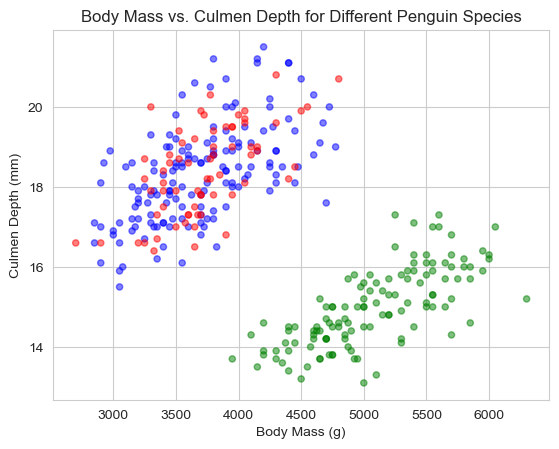

In [30]:
species_list = ['Adelie', 'Gentoo', 'Chinstrap']
species_pen = pen[pen['species'].isin(species_list)]
colors = {'Adelie':'blue', 'Gentoo':'green', 'Chinstrap':'red'}
species_pen['color'] = species_pen['species'].apply(lambda x: colors[x])

sp1 = species_pen.plot(kind='scatter', x='body_mass_g', y='culmen_depth_mm', c=species_pen['color'], alpha=0.5)

sp1.set_xlabel('Body Mass (g)')
sp1.set_ylabel('Culmen Depth (mm)')
sp1.set_title('Body Mass vs. Culmen Depth for Different Penguin Species')

plt.show()

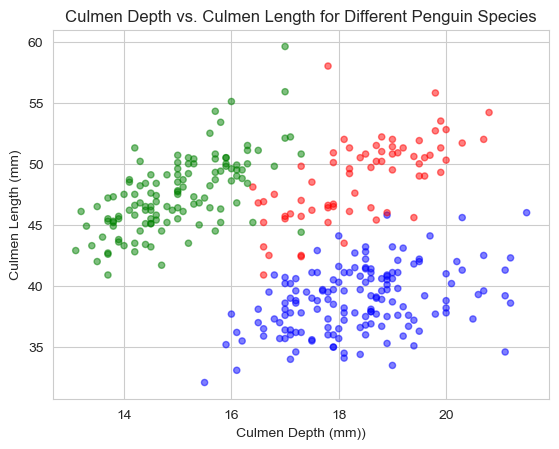

In [31]:
species_list = ['Adelie', 'Gentoo', 'Chinstrap']
species_pen = pen[pen['species'].isin(species_list)]
colors = {'Adelie':'blue', 'Gentoo':'green', 'Chinstrap':'red'}
species_pen['color'] = species_pen['species'].apply(lambda x: colors[x])

sp1 = species_pen.plot(kind='scatter', x='culmen_depth_mm', y='culmen_length_mm', c=species_pen['color'], alpha=0.5)

sp1.set_xlabel('Culmen Depth (mm))')
sp1.set_ylabel('Culmen Length (mm)')
sp1.set_title('Culmen Depth vs. Culmen Length for Different Penguin Species')

plt.show()

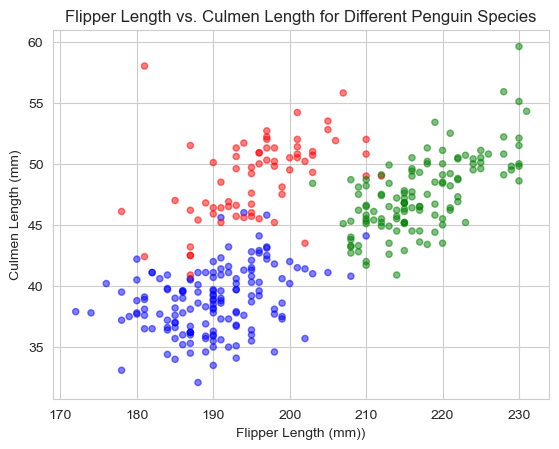

In [32]:
species_list = ['Adelie', 'Gentoo', 'Chinstrap']
species_pen = pen[pen['species'].isin(species_list)]
colors = {'Adelie':'blue', 'Gentoo':'green', 'Chinstrap':'red'}
species_pen['color'] = species_pen['species'].apply(lambda x: colors[x])

sp1 = species_pen.plot(kind='scatter', x='flipper_length_mm', y='culmen_length_mm', c=species_pen['color'], alpha=0.5)

sp1.set_xlabel('Flipper Length (mm))')
sp1.set_ylabel('Culmen Length (mm)')
sp1.set_title('Flipper Length vs. Culmen Length for Different Penguin Species')

plt.show()

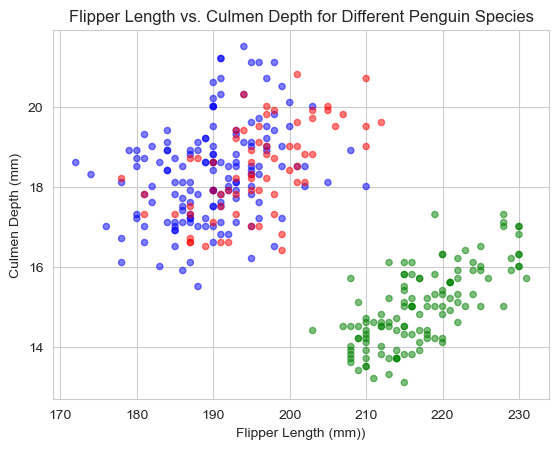

In [33]:
species_list = ['Adelie', 'Gentoo', 'Chinstrap']
species_pen = pen[pen['species'].isin(species_list)]
colors = {'Adelie':'blue', 'Gentoo':'green', 'Chinstrap':'red'}
species_pen['color'] = species_pen['species'].apply(lambda x: colors[x])

sp1 = species_pen.plot(kind='scatter', x='flipper_length_mm', y='culmen_depth_mm', c=species_pen['color'], alpha=0.5)

sp1.set_xlabel('Flipper Length (mm))')
sp1.set_ylabel('Culmen Depth (mm)')
sp1.set_title('Flipper Length vs. Culmen Depth for Different Penguin Species')

plt.show()

# SPECIES BASED SEX SCATTER PLOTS

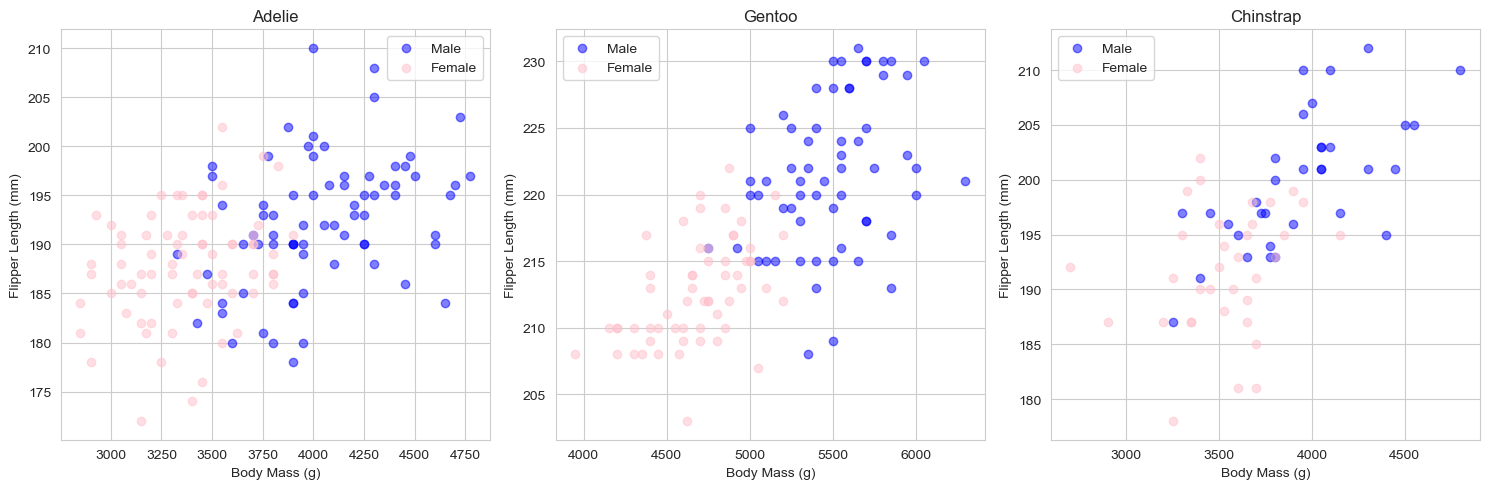

In [34]:
species_list = ['Adelie', 'Gentoo', 'Chinstrap']

colors = {'MALE': 'blue', 'FEMALE': 'pink'}

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, species in enumerate(species_list):
    species_pen = pen[pen['species'] == species]

    male_pen = species_pen[species_pen['sex'] == 'MALE']
    female_pen = species_pen[species_pen['sex'] == 'FEMALE']

    male_color = colors['MALE']
    female_color = colors['FEMALE']

    axs[i].scatter(male_pen['body_mass_g'], male_pen['flipper_length_mm'], color=male_color, alpha=0.5, label='Male')
    axs[i].scatter(female_pen['body_mass_g'], female_pen['flipper_length_mm'], color=female_color, alpha=0.5, label='Female')

    axs[i].set_title(species)
    axs[i].set_xlabel('Body Mass (g)')
    axs[i].set_ylabel('Flipper Length (mm)')

    axs[i].legend()

fig.tight_layout()

plt.show()

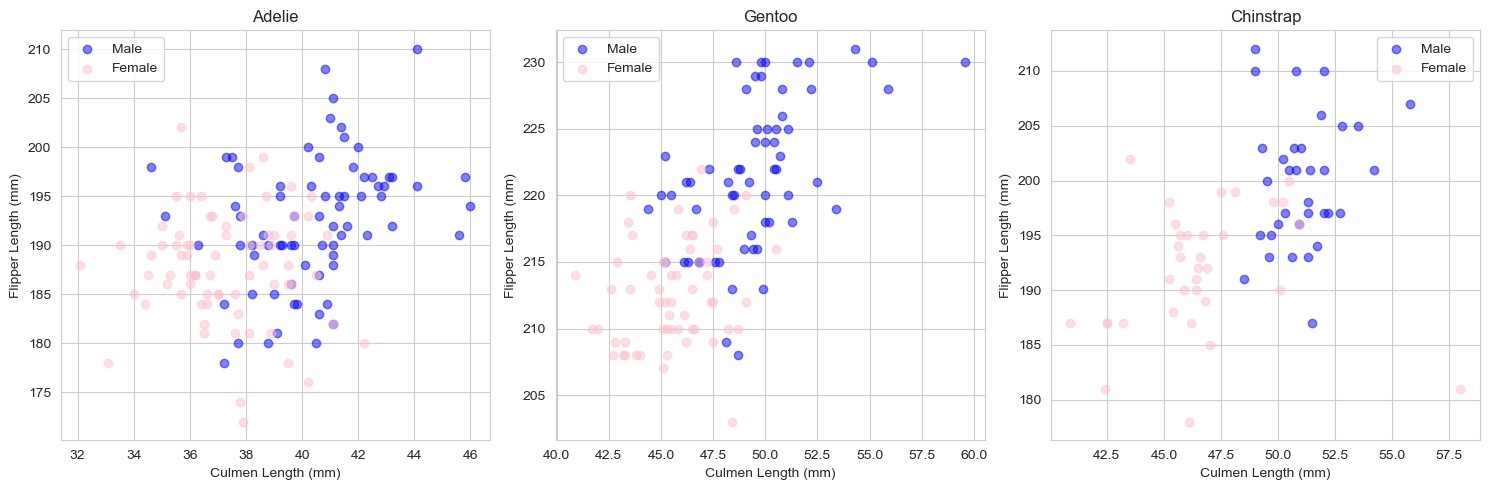

In [35]:
species_list = ['Adelie', 'Gentoo', 'Chinstrap']

colors = {'MALE': 'blue', 'FEMALE': 'pink'}

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, species in enumerate(species_list):
    species_pen = pen[pen['species'] == species]

    male_pen = species_pen[species_pen['sex'] == 'MALE']
    female_pen = species_pen[species_pen['sex'] == 'FEMALE']

    male_color = colors['MALE']
    female_color = colors['FEMALE']

    axs[i].scatter(male_pen['culmen_length_mm'], male_pen['flipper_length_mm'], color=male_color, alpha=0.5, label='Male')
    axs[i].scatter(female_pen['culmen_length_mm'], female_pen['flipper_length_mm'], color=female_color, alpha=0.5, label='Female')

    axs[i].set_title(species)
    axs[i].set_xlabel('Culmen Length (mm)')
    axs[i].set_ylabel('Flipper Length (mm)')

    axs[i].legend()

fig.tight_layout()

plt.show()

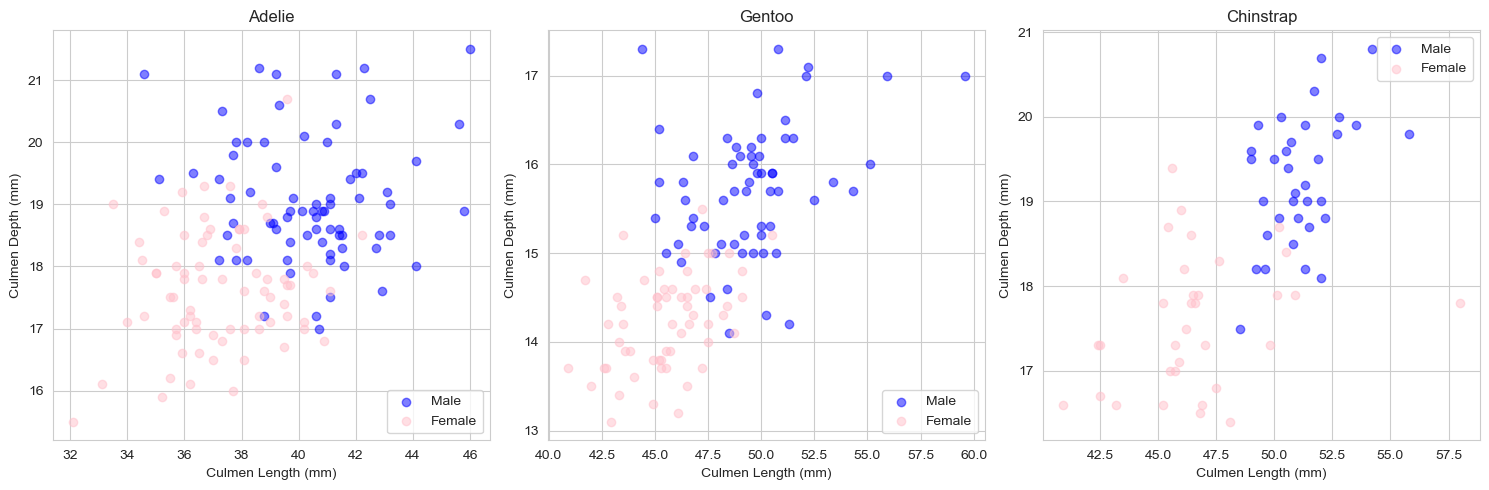

In [36]:
species_list = ['Adelie', 'Gentoo', 'Chinstrap']

colors = {'MALE': 'blue', 'FEMALE': 'pink'}

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, species in enumerate(species_list):
    species_pen = pen[pen['species'] == species]

    male_pen = species_pen[species_pen['sex'] == 'MALE']
    female_pen = species_pen[species_pen['sex'] == 'FEMALE']

    male_color = colors['MALE']
    female_color = colors['FEMALE']

    axs[i].scatter(male_pen['culmen_length_mm'], male_pen['culmen_depth_mm'], color=male_color, alpha=0.5, label='Male')
    axs[i].scatter(female_pen['culmen_length_mm'], female_pen['culmen_depth_mm'], color=female_color, alpha=0.5, label='Female')

    axs[i].set_title(species)
    axs[i].set_xlabel('Culmen Length (mm)')
    axs[i].set_ylabel('Culmen Depth (mm)')

    axs[i].legend()

fig.tight_layout()

plt.show()

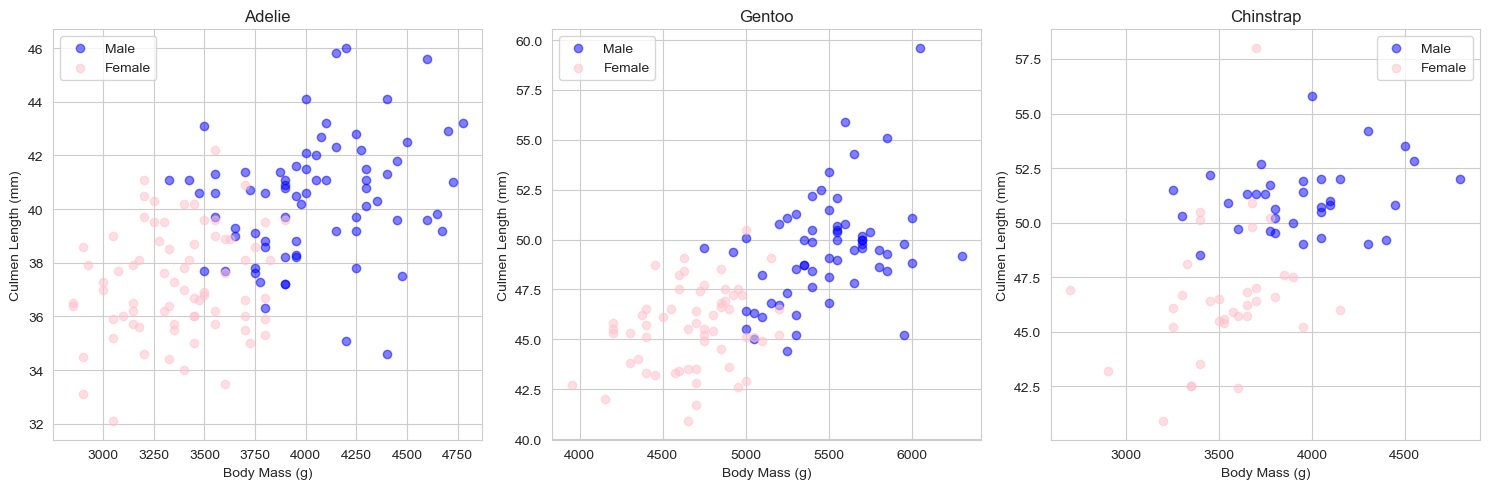

In [37]:
species_list = ['Adelie', 'Gentoo', 'Chinstrap']

colors = {'MALE': 'blue', 'FEMALE': 'pink'}

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, species in enumerate(species_list):
    species_pen = pen[pen['species'] == species]

    male_pen = species_pen[species_pen['sex'] == 'MALE']
    female_pen = species_pen[species_pen['sex'] == 'FEMALE']

    male_color = colors['MALE']
    female_color = colors['FEMALE']

    axs[i].scatter(male_pen['body_mass_g'], male_pen['culmen_length_mm'], color=male_color, alpha=0.5, label='Male')
    axs[i].scatter(female_pen['body_mass_g'], female_pen['culmen_length_mm'], color=female_color, alpha=0.5, label='Female')

    axs[i].set_title(species)
    axs[i].set_xlabel('Body Mass (g)')
    axs[i].set_ylabel('Culmen Length (mm)')

    axs[i].legend()

fig.tight_layout()

plt.show()

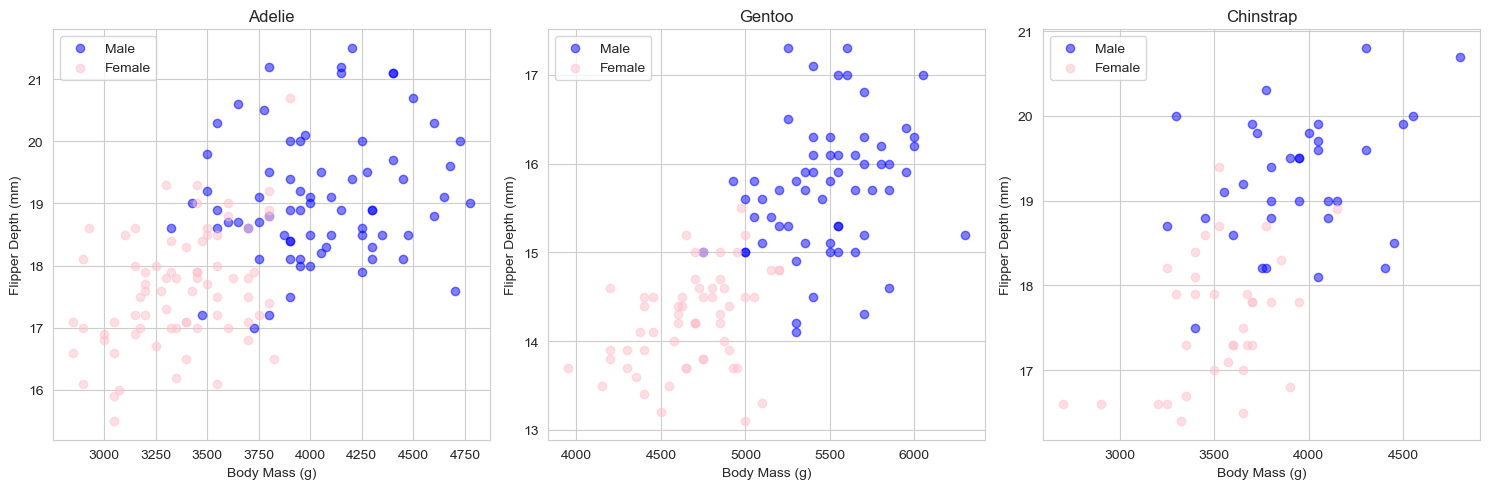

In [38]:
species_list = ['Adelie', 'Gentoo', 'Chinstrap']

colors = {'MALE': 'blue', 'FEMALE': 'pink'}

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, species in enumerate(species_list):
    species_pen = pen[pen['species'] == species]

    male_pen = species_pen[species_pen['sex'] == 'MALE']
    female_pen = species_pen[species_pen['sex'] == 'FEMALE']

    male_color = colors['MALE']
    female_color = colors['FEMALE']

    axs[i].scatter(male_pen['body_mass_g'], male_pen['culmen_depth_mm'], color=male_color, alpha=0.5, label='Male')
    axs[i].scatter(female_pen['body_mass_g'], female_pen['culmen_depth_mm'], color=female_color, alpha=0.5, label='Female')

    axs[i].set_title(species)
    axs[i].set_xlabel('Body Mass (g)')
    axs[i].set_ylabel('Flipper Depth (mm)')

    axs[i].legend()

fig.tight_layout()

plt.show()

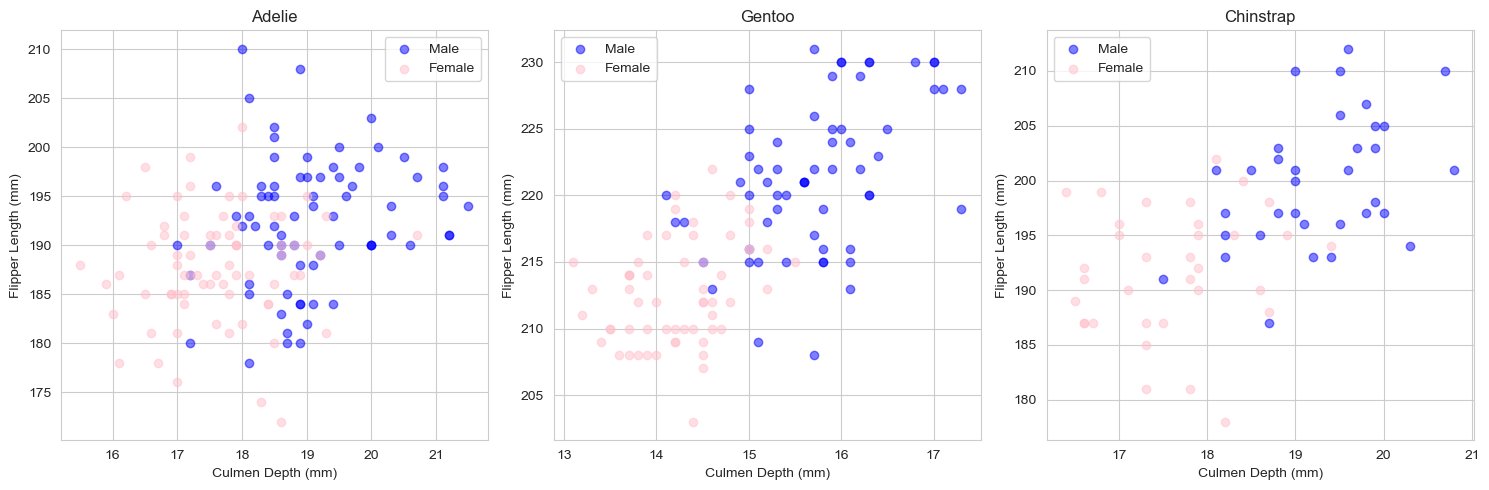

In [39]:
species_list = ['Adelie', 'Gentoo', 'Chinstrap']

colors = {'MALE': 'blue', 'FEMALE': 'pink'}

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, species in enumerate(species_list):
    species_pen = pen[pen['species'] == species]

    male_pen = species_pen[species_pen['sex'] == 'MALE']
    female_pen = species_pen[species_pen['sex'] == 'FEMALE']

    male_color = colors['MALE']
    female_color = colors['FEMALE']

    axs[i].scatter(male_pen['culmen_depth_mm'], male_pen['flipper_length_mm'], color=male_color, alpha=0.5, label='Male')
    axs[i].scatter(female_pen['culmen_depth_mm'], female_pen['flipper_length_mm'], color=female_color, alpha=0.5, label='Female')

    axs[i].set_title(species)
    axs[i].set_xlabel('Culmen Depth (mm)')
    axs[i].set_ylabel('Flipper Length (mm)')

    axs[i].legend()

fig.tight_layout()

plt.show()

These scatter plots suggest that predicting the sex of penguins might be an easier endeavor than predicting the species

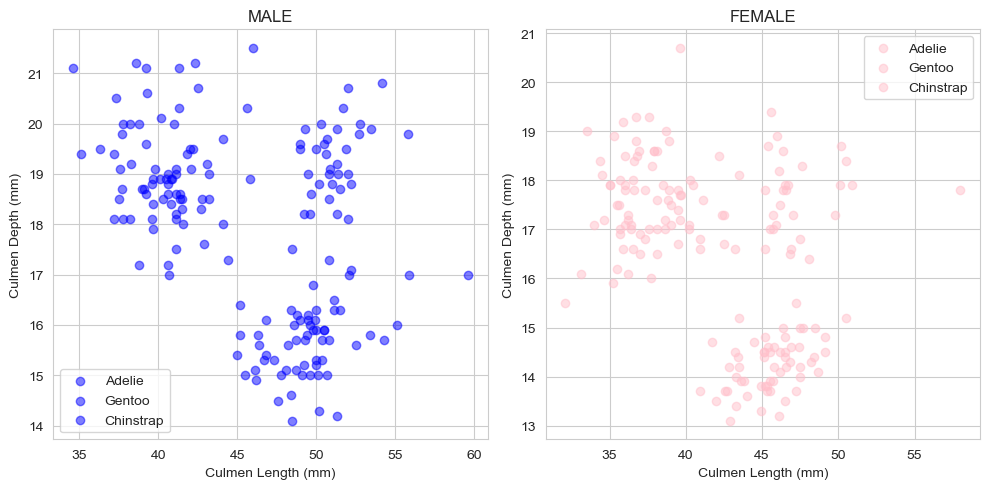

In [40]:
species_list = ['Adelie', 'Gentoo', 'Chinstrap']

colors = {'MALE': 'blue', 'FEMALE': 'pink'}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, sex in enumerate(['MALE', 'FEMALE']):
    ax = axs[i]

    for species in species_list:
        pen_species_sex = pen[(pen['species'] == species) & (pen['sex'] == sex)]

        color = colors[sex]

        ax.scatter(pen_species_sex['culmen_length_mm'], pen_species_sex['culmen_depth_mm'], color=color, alpha=0.5, label=species)

    ax.set_title(sex)
    ax.set_xlabel('Culmen Length (mm)')
    ax.set_ylabel('Culmen Depth (mm)')

    ax.legend()

fig.tight_layout()

plt.show()

# LABEL ENCODING 

In [41]:
le = LabelEncoder()
pen['sex'] = le.fit_transform(pen['sex'])
pen['species'] = le.fit_transform(pen['species'])
pen['island'] = le.fit_transform(pen['island'])

print(pen.head())

   species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        0       2              39.1             18.7              181.0   
1        0       2              39.5             17.4              186.0   
2        0       2              40.3             18.0              195.0   
4        0       2              36.7             19.3              193.0   
5        0       2              39.3             20.6              190.0   

   body_mass_g  sex  
0       3750.0    1  
1       3800.0    0  
2       3250.0    0  
4       3450.0    0  
5       3650.0    1  


In [42]:
pen

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0          0       2              39.1             18.7              181.0   
1          0       2              39.5             17.4              186.0   
2          0       2              40.3             18.0              195.0   
4          0       2              36.7             19.3              193.0   
5          0       2              39.3             20.6              190.0   
..       ...     ...               ...              ...                ...   
338        2       0              47.2             13.7              214.0   
340        2       0              46.8             14.3              215.0   
341        2       0              50.4             15.7              222.0   
342        2       0              45.2             14.8              212.0   
343        2       0              49.9             16.1              213.0   

     body_mass_g  sex  
0         3750.0    1  
1         3800.0    0  
2         3250.0    0  
4         3450.0    0  
5         3650.0    1  
..           ...  ...  
338       4925.0    0  
340       4850.0    0  
341       5750.0    1  
342       5200.0    0  
343       5400.0    1  

[342 rows x 7 columns]

# LOGISTIC REGRESSION MODEL 1: PREDICTING SEX

# SPLITTING DATA TO PREDICT SEX

In [43]:
from sklearn import preprocessing as prep
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

X = pen.drop(['sex'], axis=1)
y = pen['sex'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(342, 6)
(273, 6)
(69, 6)
(273,)
(69,)


# NORMALIZING THE SPLIT DATA

In [45]:
scaler = StandardScaler()
X_train[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(X_train[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])
X_test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.transform(X_test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [46]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(342, 6)
(273, 6)
(69, 6)


# CREATING FIRST LOGREG MODEL 

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# EVALUATE THE FIRST LOGREG MODEL

In [48]:
r = logreg.score(X_test, y_test)

y_predict = logreg.predict(X_test)


In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}".format(acc))
#use accuracy , precision and f1 score

y_proba = logreg.predict_proba(X_test)
auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("AUC Score: {:.2f}".format(auc))

Accuracy Score: 0.88
AUC Score: 0.81


In [50]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[31  1  0]
 [ 5 30  0]
 [ 2  0  0]]


# WHAT DO THESE SCORES MEAN FOR THE FIRST LOGREG?

We can use these scores to evaluate the performance and accuracy of the model. An **accuracy score** of 0.88 indicates that 88% of the instances in the data were correctly predicted by the model. The **AUC score** of 0.81 tells us that the model is doing fairly well at predicting between positive and negative instances. A score of 0.5 indicates random guessing, so 0.81 is much better and indicates the model is NOT just randomly guessing instances. As far as the **confusion matrix**, we see pretty good results and only seems to have trouble with a few instances from class 1 being identified as class 2. Overall, most of these results seem to indicate the model has done a good job of predicting the sex of the penguins in the data. However, the confusion matrix is the only result that seems to show otherwise.

# LOGISTIC REGRESSION MODEL 2: PREDICTING SPECIES

# SPLITTING DATA TO PREDICT SPECIES

In [51]:
X2 = pen.drop(['species'], axis=1)
y2 = pen['species'] 

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [52]:
print(X2.shape)
print(X2_train.shape)
print(X2_test.shape)

(342, 6)
(273, 6)
(69, 6)


# NORMALIZING THE SPLIT DATA


In [53]:
scaler = StandardScaler()
X2_train[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(X2_train[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])
X2_test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.transform(X2_test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [54]:
print(X2.shape)
print(X2_train.shape)
print(X2_test.shape)

(342, 6)
(273, 6)
(69, 6)


# CREATING SECOND LOGREG MODEL

In [55]:
logreg2 = LogisticRegression()
logreg2.fit(X2_train, y2_train)

y2_pred = logreg2.predict(X2_test)

# EVALUATE THE SECOND LOGREG MODEL


In [56]:
r2 = logreg2.score(X2_test, y2_test)

y2_predict = logreg2.predict(X2_test)


In [57]:
y2_pred = logreg2.predict(X2_test)
acc2 = accuracy_score(y2_test, y2_pred)
print("Accuracy Score: {:.2f}".format(acc2))

y2_proba = logreg2.predict_proba(X2_test)
auc2 = roc_auc_score(y2_test, y2_proba, multi_class='ovr')
print("AUC Score: {:.2f}".format(auc2))

Accuracy Score: 1.00
AUC Score: 1.00


In [58]:
y2_pred = logreg.predict(X2_test)
cm2 = confusion_matrix(y2_test, y2_pred)
print(cm2)

[[13 22  0]
 [ 7  5  0]
 [ 0 22  0]]


C:\Users\ljabl\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- sex
Feature names seen at fit time, yet now missing:
- species




# WHAT DO THESE SCORES MEAN FOR THE SECOND LOGREG?

Based on perfect score results from the accuracy score, and AUC score, it seems this model does a perfect job of predicting the species of the penguins in the data. However, the confusion matrix shows issues with classifying the third class of penguin species. It could be likely that this model is actually overfitting to the noise in the dataset instead of catching important patterns, resulting in inflated scores that indicate perfect fit and outstanding predicting ability. It may be best to look at other models to cross-validate predicting the species of the penguins in the dataset.

# RANDOM FOREST MODEL 1: PREDICTING SEX

In [59]:
from sklearn.ensemble import RandomForestClassifier

X3 = pen.drop('sex', axis=1)
y3 = pen['sex']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X3_train, y3_train)

y3_pred = rf.predict(X3_test)

print(y3_pred)

[0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1
 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1]


# EVALUATE THE FIRST RANDOM FOREST MODEL

In [60]:
acc3 = accuracy_score(y3_test, y3_pred)
print('Accuracy of Random Forest:', acc3)


y3_pred_proba = rf.predict_proba(X3_test)
auc3 = roc_auc_score(y3_test, y3_pred_proba, multi_class='ovr')
print('AUC Score of Random Forest: ', auc3)

Accuracy of Random Forest: 0.8695652173913043
AUC Score of Random Forest:  0.7592237010778495


In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y3_test, y3_pred, average='weighted', zero_division=1.0)
recall = recall_score(y3_test, y3_pred, average='weighted')
f1 = f1_score(y3_test, y3_pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Precision: 0.8879598662207359
Recall: 0.8695652173913043
F1 score: 0.8576004522115973


In [62]:
cm3 = confusion_matrix(y3_test, y3_pred)
print(cm3)

[[31  1  0]
 [ 6 29  0]
 [ 2  0  0]]


Feature ranking:
1. body_mass_g (0.307492)
2. culmen_depth_mm (0.281550)
3. culmen_length_mm (0.202590)
4. flipper_length_mm (0.147998)
5. species (0.041367)
6. island (0.019002)


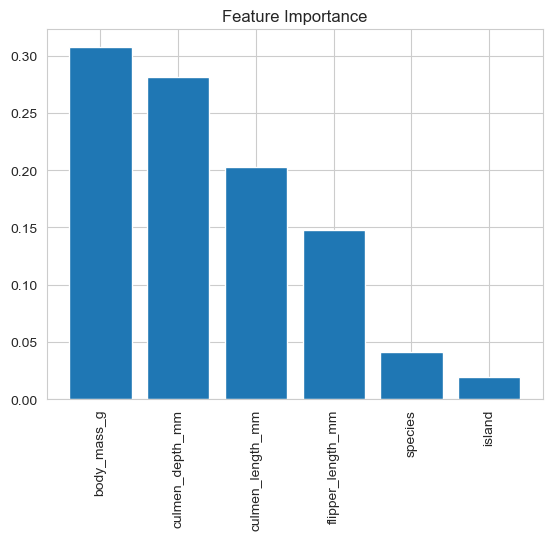

In [63]:
importances = rf.feature_importances_
features = X3.columns
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X3.shape[1]):
    print("%d. %s (%f)" % (f + 1, X3.columns[indices[f]], importances[indices[f]]))
    
  
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X3.shape[1]), importances[indices])
plt.xticks(range(X3.shape[1]), features[indices], rotation=90)
plt.show()

In [64]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X3, y3, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean score:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

Cross-validation scores: [0.85507246 0.84057971 0.82352941 0.89705882 0.86764706]
Mean score: 0.8567774936061381
Standard deviation: 0.0249457140621075


In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 500],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 4, 6]}

grid_search = GridSearchCV(rf, param_grid, cv=5)

grid_search.fit(X3_train, y3_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 200}
Best cross-validation score: 0.9012794612794611


# WHAT DO THESE SCORES MEAN FOR THE FIRST RANDOM FOREST?

For our random forest model that predicts the sex of the penguins, we see overall pretty good results. Our **accuracy score** of 0.87 means that the model predicted the correct classification for 87% of the data points in the dataset. The **AUC score**, or area under the curve, was approximately 0.76. This shows some room for improvement for our model's ability to make predcitions, but with 0.50 indicating random chance guessing, 0.76 is significantly better performance. The **precision score** of 0.89 indicates that out of all predicted positive cases, approximately 89% of them were correctly identified true positive cases. The **recall** indicates that out of the data's actual positive cases, the model correctly identified approximately 0.87 of them. **F1** essentially uses the precision score and the recall score to give an overall metric for model performance, which in this case is approximately 0.86, which is a pretty decent score for our model's overall ability to indentify and predict penguin sexes. Taking a look at our **confusion matrix**, it seems the biggest issue our model had was incorrectly predicting 6 instances of class 1 into the class 2 category. We predict that similarity between species might have made it difficult to differentiate between sexes in some cases.

We wanted to look at our **feature importance** in the random forest model. We see that body mass is the most critical feature in predicting sex in this model, followed by the culmen or beak depth of the penguins. This seems accurate, as in all our graphs above that are sorted by sex, the male penguins across all species tend to have higher body masses and larger culmen depths when compared to female penguins across all species. Therefore, it makes sense that these two features would be the most useful in indetifying the penguin's sex.

To look further at our model's performance, we **cross-validated** our scores. This returned the accuracy scores of [0.85507246 0.84057971 0.82352941 0.89705882 0.86764706], with a mean accuracy score of approximately 0.86 out of the cross-validated scores, and a standard deviation of 0.02. 0.86 is very close to our original model's accuracy score of 0.87, and a standard deviation of 0.02 is small and insignifcant. All of this is to say that our cross-validation alligns with the original performance statistics from the orignal run of our model.

Finally, the **grid search** function shows us the most optimized version of our model, including number of trees, splits, and depth of the trees in the random forest model. From this, we see we get a best accuracy cross-validation score of 0.90. This information gives us tools and metrics to help optimize our model's performance by 3%-4% points.


# RANDOM FOREST MODEL 2: PREDICTING SPECIES

In [66]:
X4 = pen.drop(columns=['species'])
y4 = pen['species']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

rf2 = RandomForestClassifier(n_estimators=100, random_state=42)

rf2.fit(X4_train, y4_train)

y4_pred = rf2.predict(X4_test)

print(y4_pred)

[2 0 0 1 0 2 1 1 2 0 0 2 2 2 0 1 0 0 1 0 1 0 2 0 0 0 0 1 0 2 1 0 0 2 0 0 1
 2 1 0 0 0 2 2 0 1 2 2 0 0 2 1 2 0 0 1 0 2 2 0 2 2 2 2 1 1 0 0 0]


# EVALUATE THE SECOND RANDOM FOREST MODEL

In [67]:
acc4 = accuracy_score(y4_test, y4_pred)
print('Accuracy of Random Forest:', acc4)


y4_pred_proba = rf2.predict_proba(X4_test)
auc4 = roc_auc_score(y4_test, y4_pred_proba, multi_class='ovr')
print('AUC Score of Random Forest: ', auc4)

Accuracy of Random Forest: 0.9565217391304348
AUC Score of Random Forest:  1.0


In [68]:
precision2 = precision_score(y4_test, y4_pred, average='weighted', zero_division=1.0)
recall2 = recall_score(y4_test, y4_pred, average='weighted')
f1_2 = f1_score(y4_test, y4_pred, average='weighted')

print('Precision:', precision2)
print('Recall:', recall2)
print('F1 score:', f1_2)

Precision: 0.9652173913043477
Recall: 0.9565217391304348
F1 score: 0.957963804167568


In [69]:
cm4 = confusion_matrix(y4_test, y4_pred)
print(cm4)

[[32  3  0]
 [ 0 12  0]
 [ 0  0 22]]


Feature ranking:
1. culmen_length_mm (0.386849)
2. flipper_length_mm (0.229777)
3. culmen_depth_mm (0.153411)
4. body_mass_g (0.118695)
5. island (0.104584)
6. sex (0.006684)


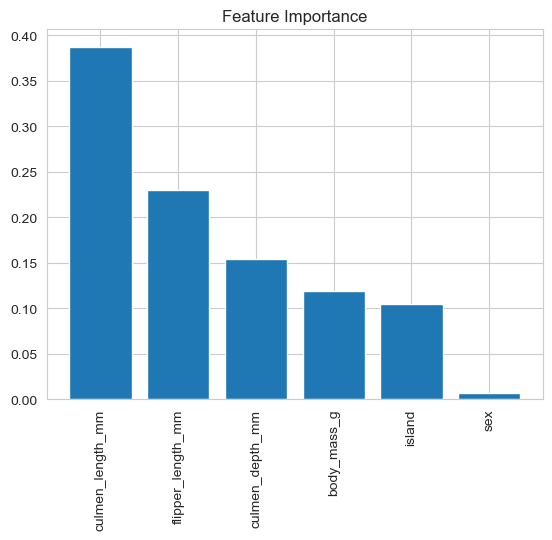

In [70]:
importances2 = rf2.feature_importances_
features2 = X4.columns
indices2 = np.argsort(importances2)[::-1]

print("Feature ranking:")

for f in range(X4.shape[1]):
    print("%d. %s (%f)" % (f + 1, X4.columns[indices2[f]], importances2[indices2[f]]))
    
    
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X4.shape[1]), importances2[indices2])
plt.xticks(range(X4.shape[1]), features2[indices2], rotation=90)
plt.show()

In [71]:
cv_scores2 = cross_val_score(rf2, X4, y4, cv=5)
#pretty print

print("Cross-validation scores:", cv_scores2)
print("Mean score:", np.mean(cv_scores2))
print("Standard deviation:", np.std(cv_scores2))

Cross-validation scores: [1.         1.         0.98529412 0.98529412 1.        ]
Mean score: 0.9941176470588236
Standard deviation: 0.007204381596421087


In [ ]:
param_grid_2 = {'n_estimators': [100, 200, 500],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 4, 6]}

grid_search_2 = GridSearchCV(rf2, param_grid_2, cv=5)

grid_search_2.fit(X4_train, y4_train)

print("Best hyperparameters: ", grid_search_2.best_params_)
print("Best cross-validation score:", grid_search_2.best_score_)

# WHAT DO THESE SCORES MEAN FOR THE SECOND RANDOM FOREST?

In this random forest model that predicts the species of our penguins, we again see good scores overall when taking into account all of the different metrics we recieved. For our model's **accuracy score** of approximately 0.96 this indicates the model correctly classified 96% of the instances in the dataset. The **AUC score** was 1.0. This shows the model has reached a perfect level of identifying between classes (aka sepcies) in the data. Because of our high accuracy score, this could be a valid metric, but it is still possible that overfitting could be occuring, as with our linear regression model that predicted penguin species. The **precision score** of approximately 0.97 indicates that out of all predicted positive cases, approximately 97% of them were correctly identified true positive cases. The **recall** indicates that out of the data's actual positive cases, the model correctly identified approximately 0.96 of them. **F1** again uses the precision score and the recall score to give an overall metric for model performance, which in this case is approximately 0.96, which is a great score for our model's overall ability to indentify and predict penguin species. Taking a look at our **confusion matrix**, it seems the biggest issue our model had was incorrectly predicting 3 instances of class 2 into the class 1 category. We predict that similarity between species might have made it difficult to differentiate between them in some cases.

We wanted to look at our **feature importance** in the random forest model. We see that culmen length is the most critical feature in predicting species in this model, followed by the flipper length of the penguins. This seems accurate, as in all our graphs above that are sorted by species, we see the most distinct differences between species when looking at these two indicators. Therefore, it makes sense that these two features would be the most useful in indetifying the penguin's species.

To look further at our model's performance, we **cross-validated** our scores. This returned the accuracy scores of [1.00, 1.00, 0.98529412, 0.98529412, 1.00], with a mean accuracy score of approximately 0.99 out of the cross-validated scores, and a standard deviation of 0.007. 0.99 is very close to our original model's accuracy score of 0.96, and a standard deviation of 0.007 is small and insignifcant. All of this is to say that our cross-validation alligns with the original performance statistics from the orignal run of our model.

Finally, the **grid search** function shows us the most optimized version of our model, including number of trees, splits, and depth of the trees in the random forest model. From this, we see we get a best accuracy cross-validation score of approximately 0.99. This information gives us tools and metrics to help optimize our model's performance by 3% points.



# KMEANS

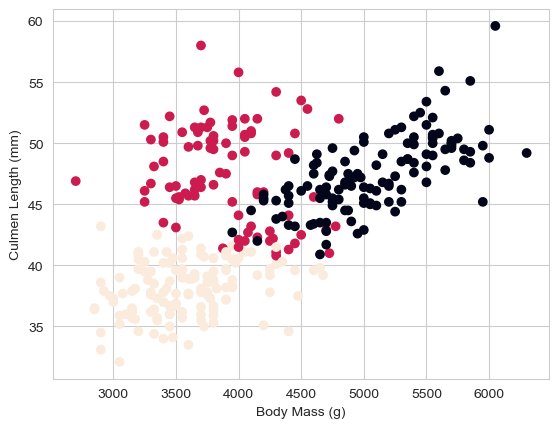

In [73]:
from sklearn.cluster import KMeans

X5 = pen[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X5)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_
pen['cluster'] = labels
plt.scatter(pen['body_mass_g'], pen['culmen_length_mm'], c=pen['cluster'])
plt.xlabel('Body Mass (g)')
plt.ylabel('Culmen Length (mm)')
plt.show()

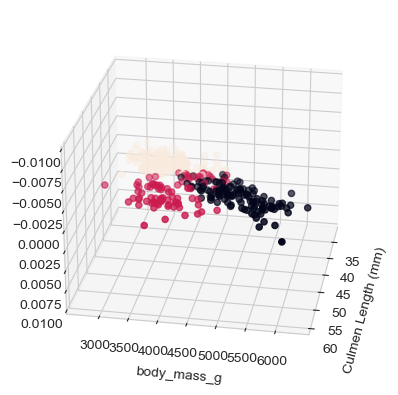

In [74]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X5['culmen_length_mm'], X5['body_mass_g'], c=pen['cluster'])

ax.set_xlabel('Culmen Length (mm)')
ax.set_ylabel('body_mass_g')
ax.set_zlim(0.01, -0.01)
ax.view_init(elev=25, azim=10)

plt.show()

# WHAT DOES THE K MEANS MODEL SHOW US?

The k means model further exemplifies the distinct clustering behavior between the three different penguin species in the dataset. Based on their two most critical predicting features, body mass and culmen lenghth, we can see how the different groups are distributed in their differences between these physical measurements.